In [69]:
def plot_scatter(target_runs):
    import plotly.express as px
    import pandas as pd
    import math
    
    # Assuming target_runs is prepared with your data
    # Convert target_runs to a DataFrame for easier manipulation with Plotly
    df = pd.DataFrame(target_runs, columns=['train_loss', 'eval_loss', 'lr', 'width'])
    
    # Apply log scale to lr for the plot
    df['log_lr'] = df['lr'].apply(lambda x: math.log2(x))
    
    # Creating the plot
    fig = px.line(df, x='log_lr', y='train_loss',
                  color='width',  # This separates the lines by width
                  hover_data=['width'],  # This adds the width to the hover information
                  title='Training Loss vs. Log-Scaled Learning Rate',
                  labels={'log_lr': 'Log Scale Learning Rate (log2(lr))', 'train_loss': 'Training Loss', 'width': 'Width'})
    
    # Update the line titles to include the width value
    for width, trace in zip(df['width'].unique(), fig.data):
        trace.name = f'Width: {width}'

    y_min = df['train_loss'].min()  # Adjust the lower bound as needed
    y_max = 0.1  # Adjust the upper bound as needed
    fig.update_yaxes(range=[y_min, y_max])
    
    return fig

In [73]:
def extract_runs(num_layers, batch_size, is_mup):
    target_runs = []
    for run in runs:
        if run.config["config"]["num_layers"] == num_layers and run.config["config"]["batch_size"] == batch_size:
            # train_loss = run.history()["mup_loss"].iloc[-1]
            # eval_loss = run.history()["ref_eval_loss"].iloc[-1]
            if is_mup:
                train_loss = run.summary["mup_loss"]
                eval_loss = run.summary["mup_eval_loss"]
            else:
                train_loss = run.summary["ref_loss"]
                eval_loss = run.summary["ref_eval_loss"]

            # eval_loss = 99 if eval_loss == "nan" else eval_loss
            lr = run.config["config"]["lr"]
            width = run.config["config"]["target_width"]
            target_runs.append((train_loss, eval_loss, lr, width))

    return target_runs

In [71]:
import wandb

api = wandb.Api()
entity, project = "neuralink", "exp14_mup_grid_search"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

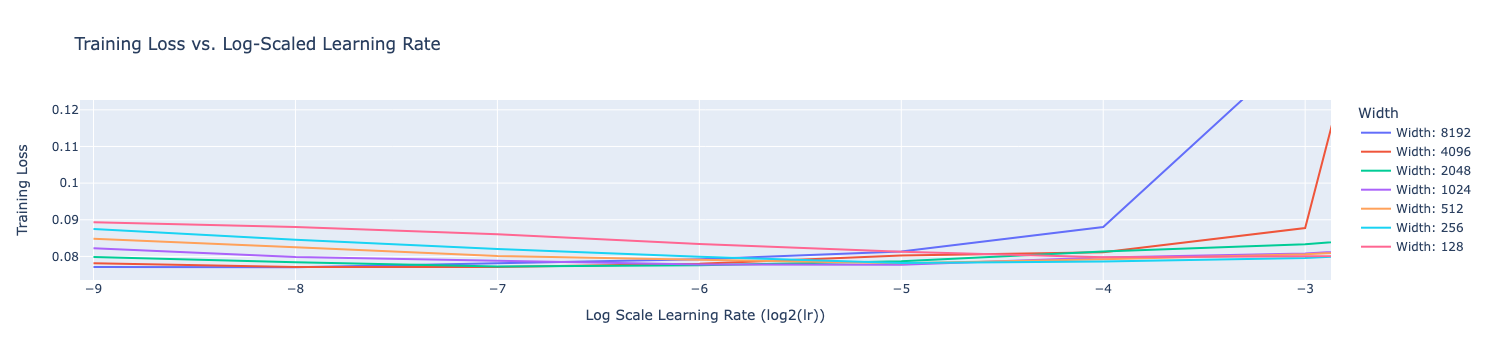

In [74]:
plot_scatter(extract_runs(num_layers=4, batch_size=128, is_mup=True)).show()

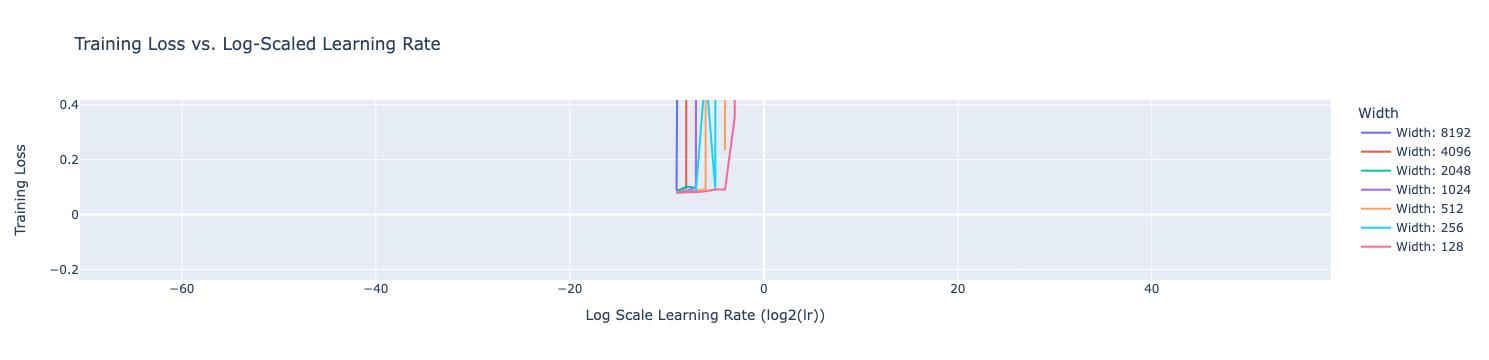

In [75]:
plot_scatter(extract_runs(num_layers=4, batch_size=128, is_mup=False)).show()

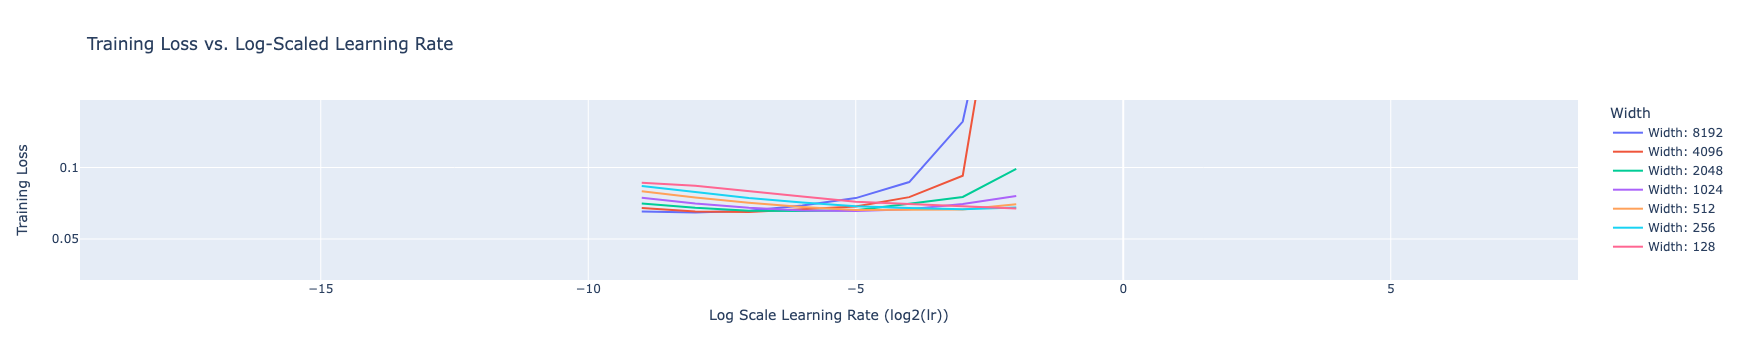

In [76]:
plot_scatter(extract_runs(num_layers=4, batch_size=256, is_mup=True)).show()

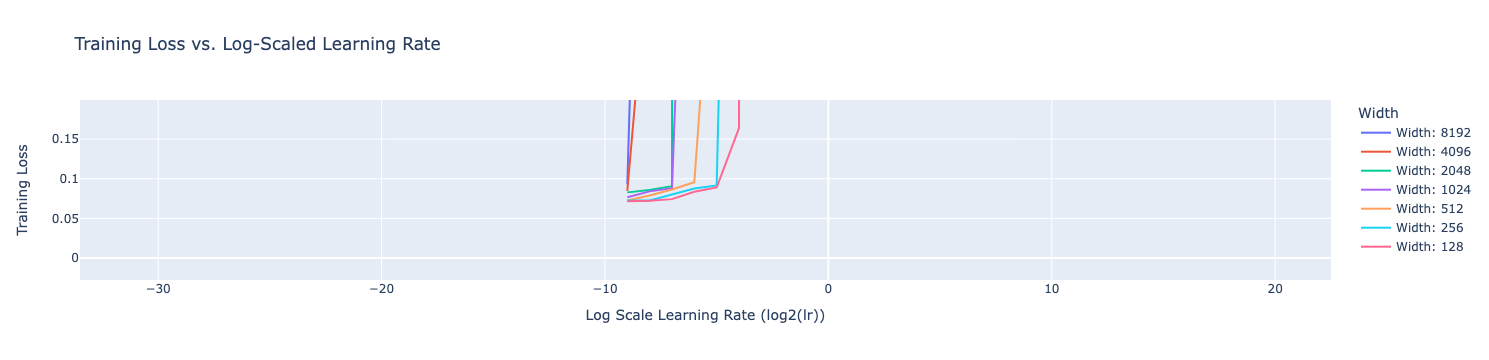

In [77]:
plot_scatter(extract_runs(num_layers=4, batch_size=256, is_mup=False)).show()

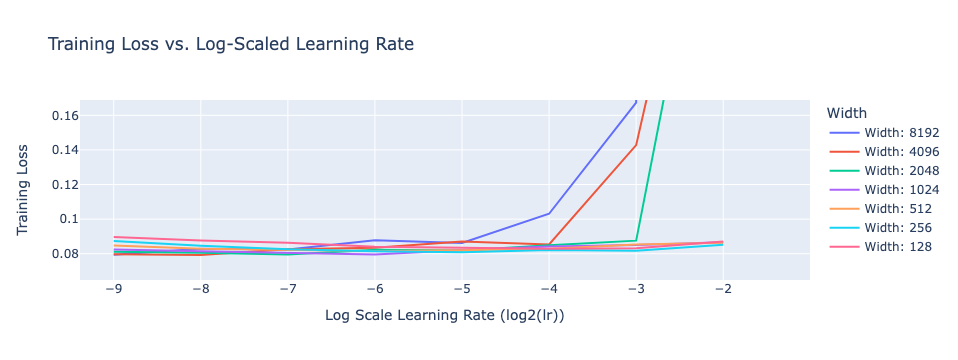

In [78]:
plot_scatter(extract_runs(num_layers=8, batch_size=128, is_mup=True)).show()

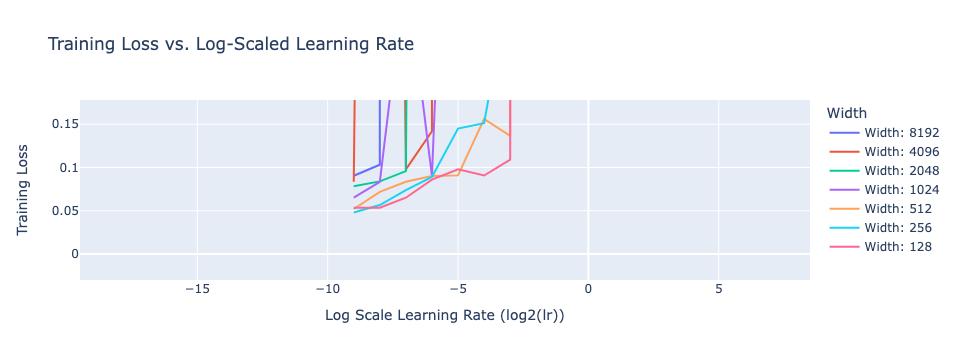

In [81]:
plot_scatter(extract_runs(num_layers=4, batch_size=2048, is_mup=False)).show()

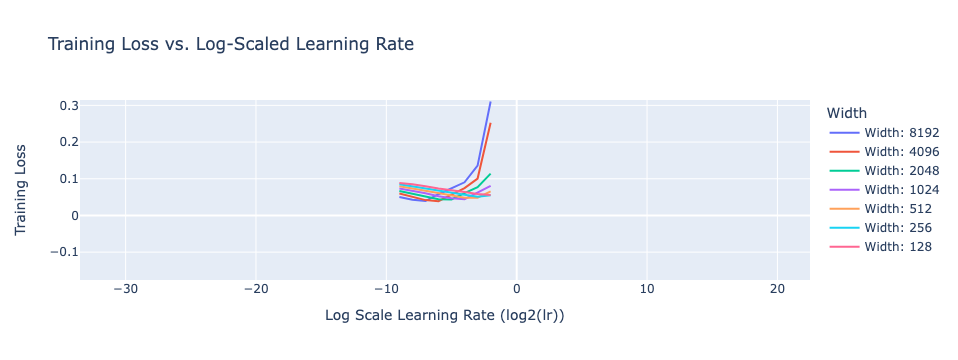

In [83]:
plot_scatter(extract_runs(num_layers=4, batch_size=2048, is_mup=True)).show()

num_layer=4, batch_size=128


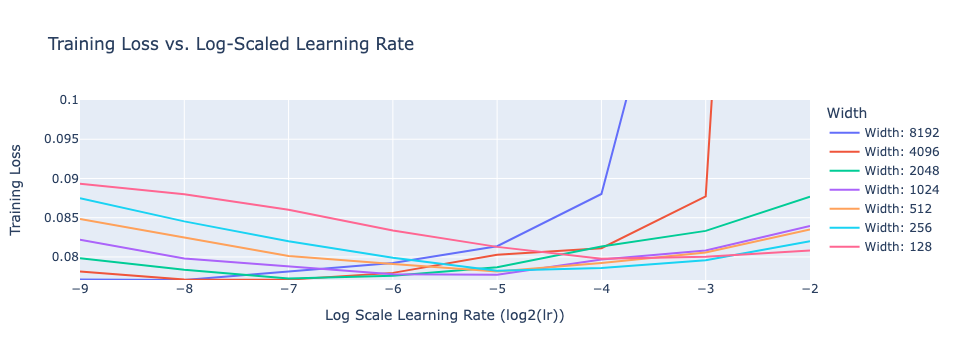

num_layer=4, batch_size=256


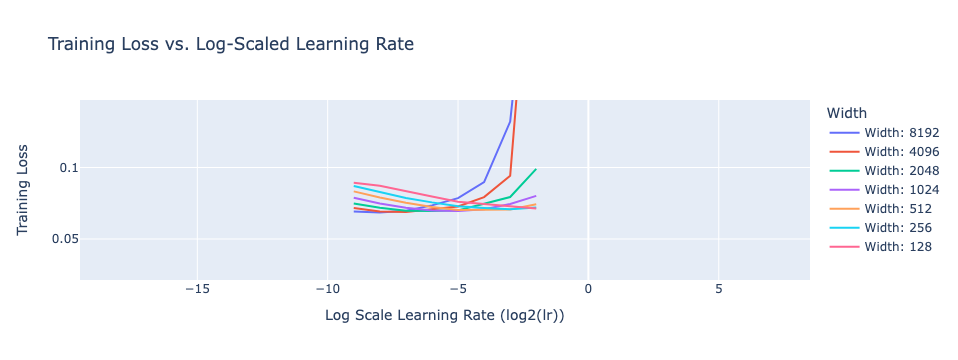

num_layer=4, batch_size=512


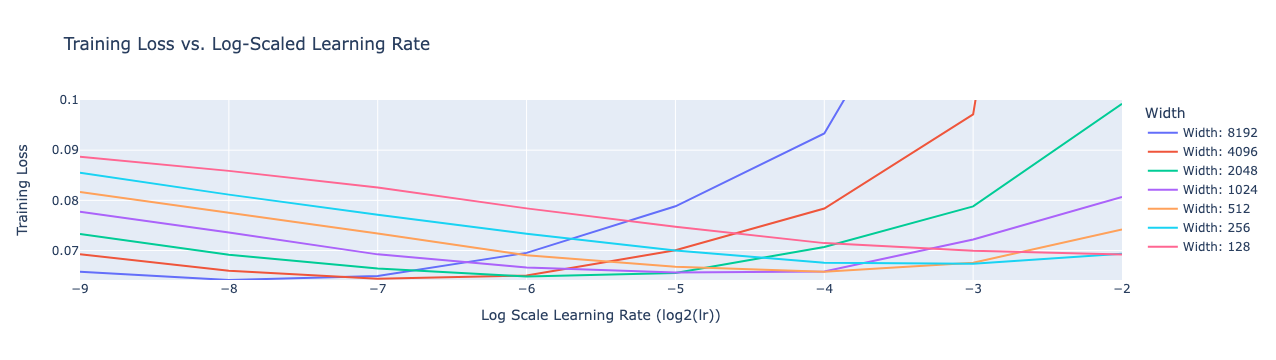

num_layer=4, batch_size=1024


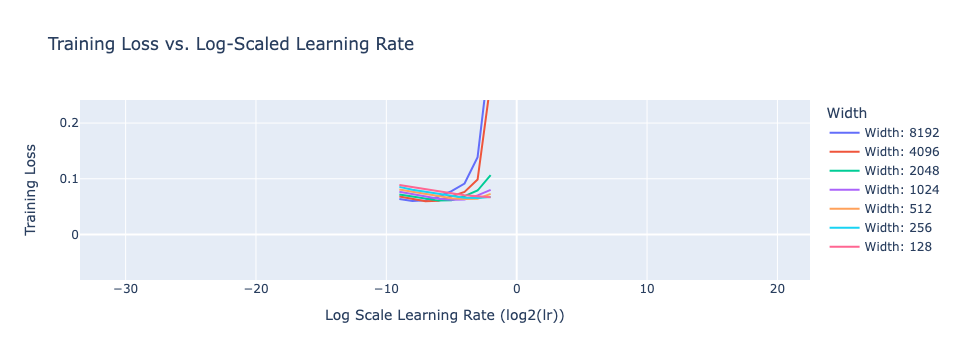

num_layer=4, batch_size=2048


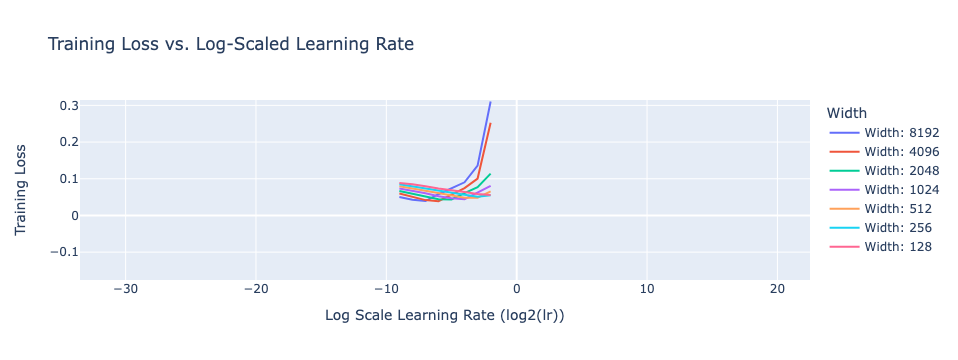

num_layer=8, batch_size=128


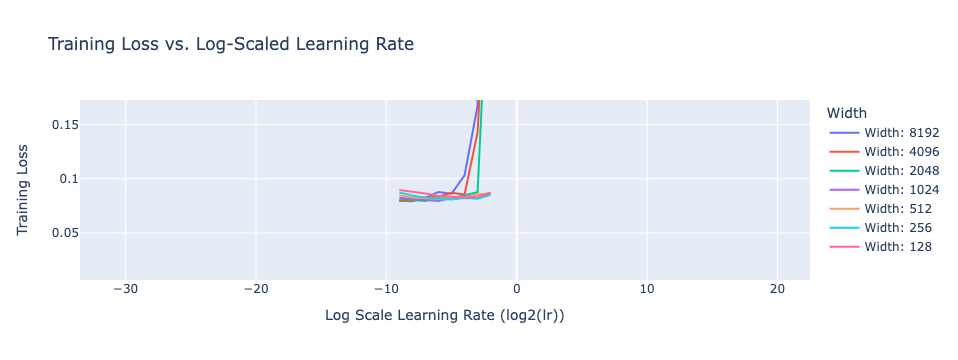

num_layer=8, batch_size=256


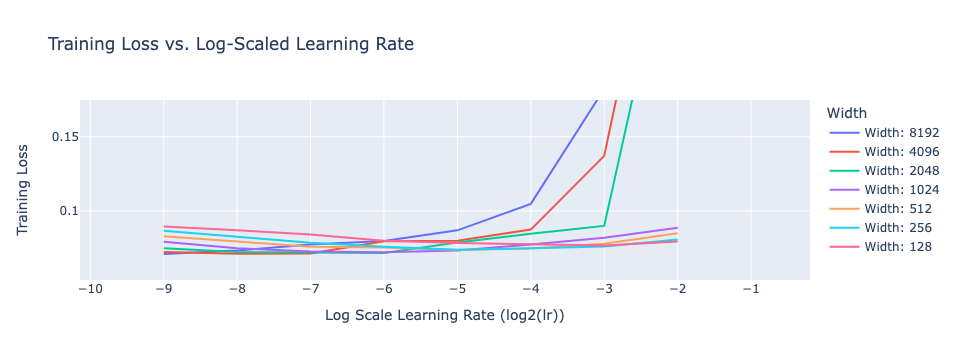

num_layer=8, batch_size=512


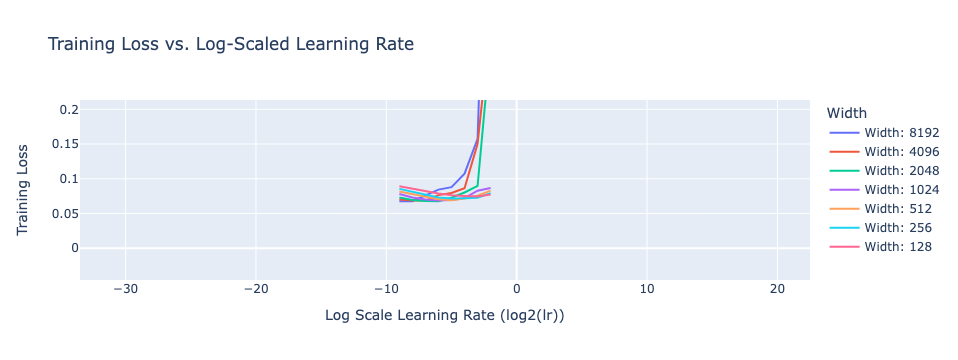

num_layer=8, batch_size=1024


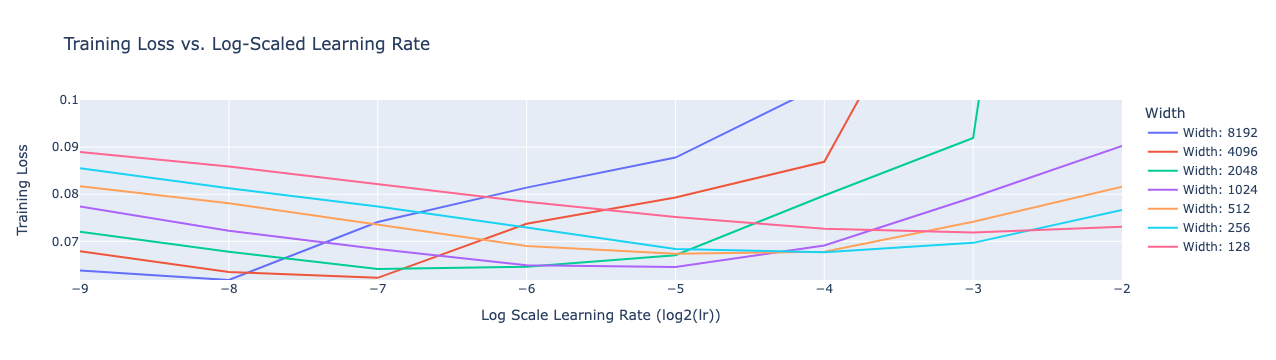

num_layer=8, batch_size=2048


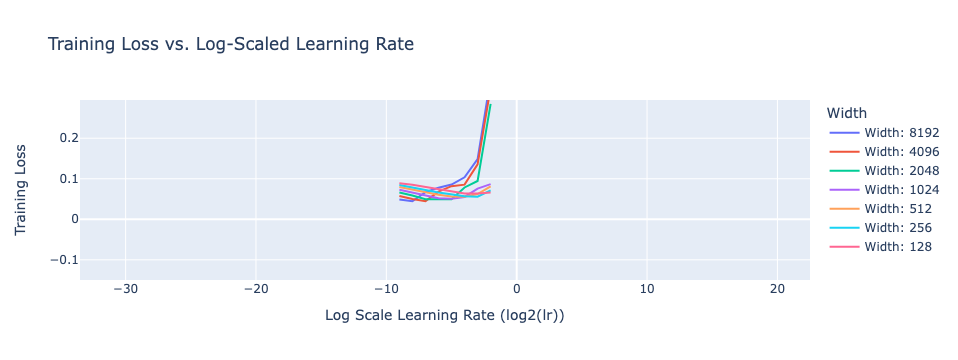

num_layer=16, batch_size=128


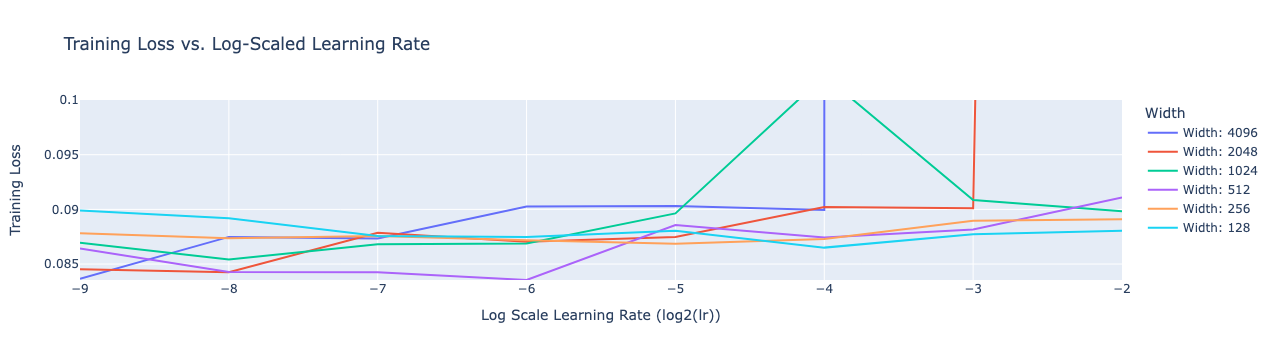

num_layer=16, batch_size=256


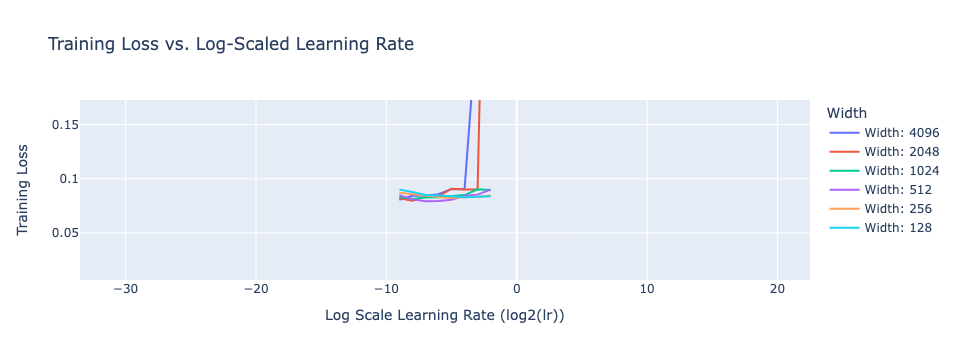

num_layer=16, batch_size=512


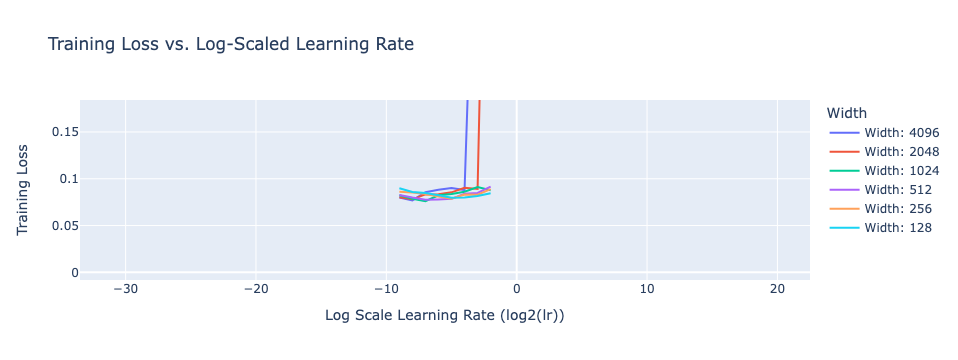

num_layer=16, batch_size=1024


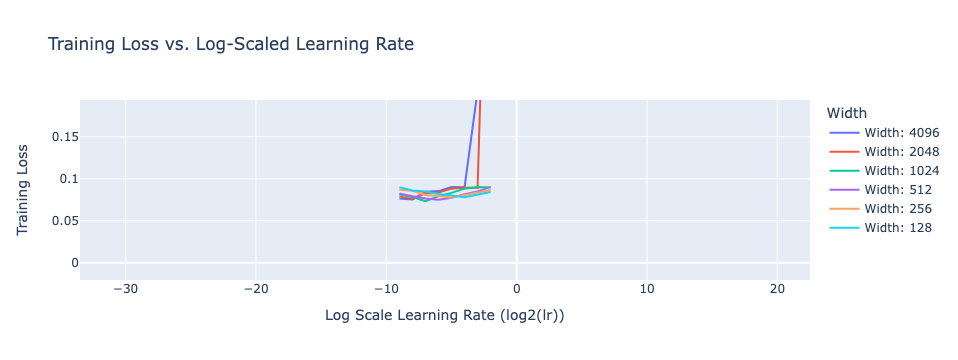

num_layer=16, batch_size=2048


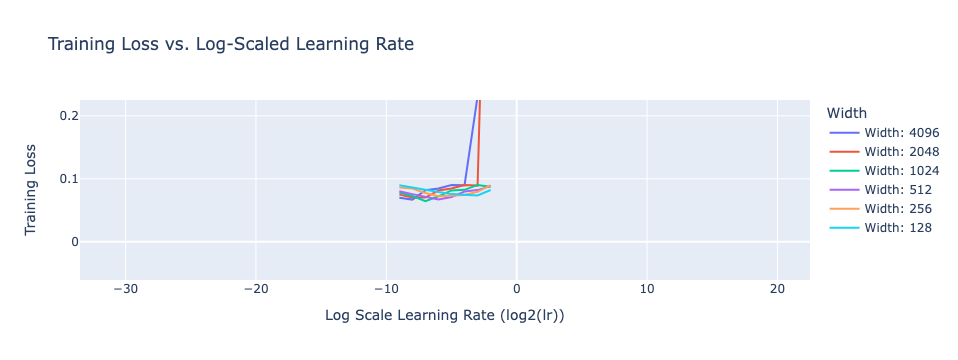

num_layer=32, batch_size=128


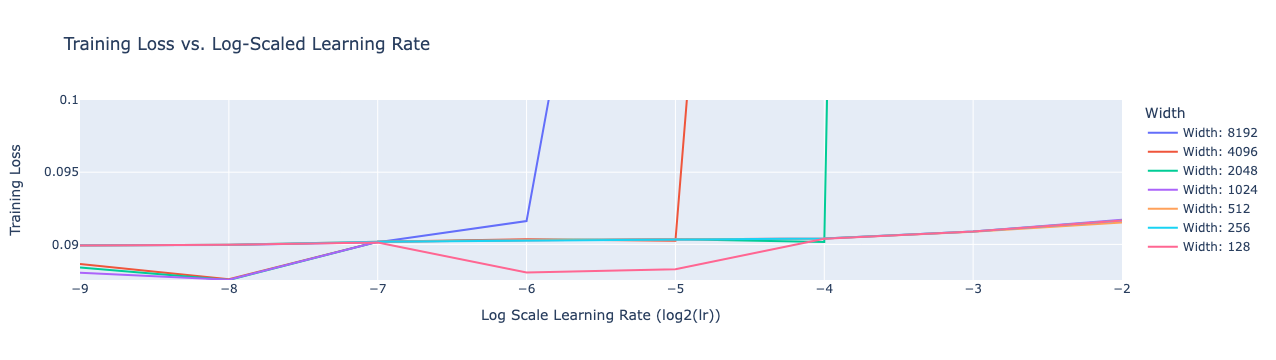

num_layer=32, batch_size=256


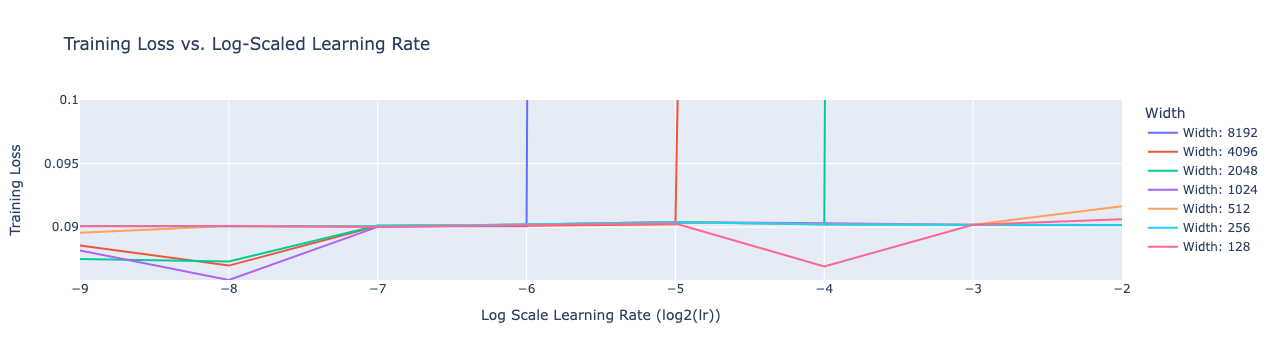

num_layer=32, batch_size=512


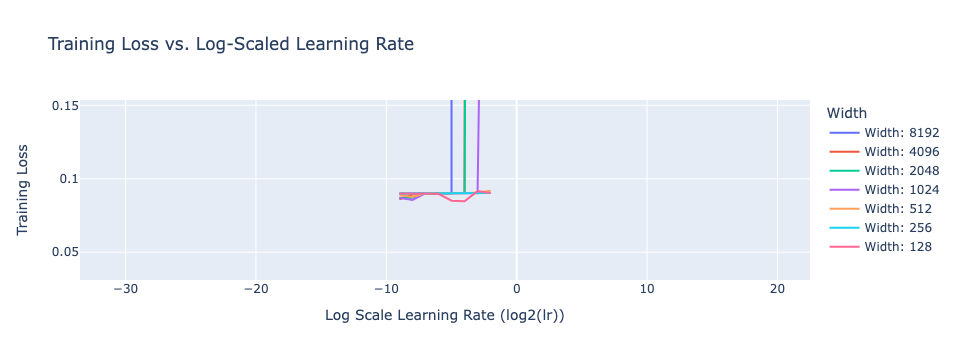

num_layer=32, batch_size=1024


KeyError: 'mup_eval_loss'

In [86]:
for num_layer in [4, 8, 16, 32]:
    for bs in [128, 256, 512, 1024, 2048]:
        print(f"num_layer={num_layer}, batch_size={bs}")
        plot_scatter(extract_runs(num_layers=num_layer, batch_size=bs, is_mup=True)).show()